In [70]:
import pandas as pd
import os
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

         Product Name        Date  Price
0    iPhone 15 128 GB  31.07.2024  48829
1    iPhone 15 128 GB  01.08.2024  48829
2    iPhone 15 128 GB  02.08.2024  49317
3    iPhone 15 128 GB  03.08.2024  49317
4    iPhone 15 128 GB  04.08.2024  48899
..                ...         ...    ...
260  iPhone 15 128 GB  01.05.2025  50999
261  iPhone 15 128 GB  02.05.2025  51149
262  iPhone 15 128 GB  03.05.2025  46500
263  iPhone 15 128 GB  07.05.2025  49659
264  iPhone 15 128 GB  08.05.2025  50648

[265 rows x 3 columns]


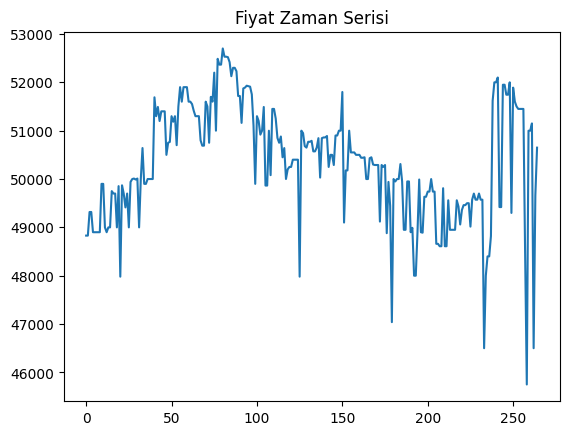

In [71]:
df = pd.read_csv(r"csv/akakce.csv")
df = df[df["Product Name"] == "iPhone 15 128 GB"]
df["Price"] = df["Price"].apply(lambda x: int(str(x).replace(" TL", "").split(",")[0].replace(".", "")))
df = df.drop_duplicates(subset=["Date"])
#df = df.drop_duplicates(subset=["Price"])
df = df.reset_index(drop=True)   
df['Price'].plot(title='Fiyat Zaman Serisi')

print(df)

In [72]:
model = ARIMA(df['Price'], order=(3, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  265
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -2172.843
Date:                Mon, 12 May 2025   AIC                           4355.686
Time:                        21:42:25   BIC                           4373.566
Sample:                             0   HQIC                          4362.871
                                - 265                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3103      0.730     -0.425      0.671      -1.742       1.121
ar.L2         -0.0880      0.092     -0.959      0.338      -0.268       0.092
ar.L3         -0.0591      0.046     -1.289      0.1

265    50541.629706
266    50300.935961
267    50326.548315
268    50346.064442
269    50351.977961
Name: predicted_mean, dtype: float64


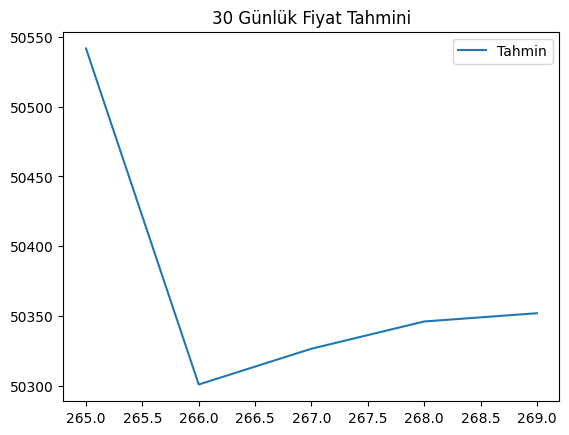

In [73]:
import matplotlib.pyplot as plt

forecast = model_fit.forecast(steps=5)
forecast.plot(label='Tahmin')
print(forecast)
plt.legend()
plt.title("30 Günlük Fiyat Tahmini")
plt.show()

In [74]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Price'])  # Zaman serisi burada 'fiyat'
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.343770964146995
p-value: 0.15823916680527544


In [75]:
df['price_diff'] = df['Price'].diff().dropna()
df.dropna(subset=['price_diff'], inplace=True)
print(len(df))
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['price_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")



264
ADF Statistic: -6.546099991568673
p-value: 9.091381776620345e-09


264    50476.315733
265    50393.800173
266    50354.141223
267    50335.080184
268    50325.918994
269    50321.515907
270    50319.399678
271    50318.382568
272    50317.893720
273    50317.658768
Name: predicted_mean, dtype: float64


C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: Va

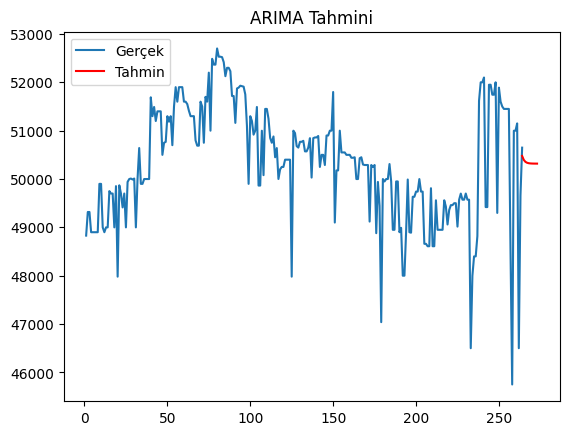

In [76]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Serin zaten varsa:
model = ARIMA(df['Price'], order=(1, 1, 1))  # Tahmini değerler
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
print(forecast)
plt.plot(df['Price'], label='Gerçek')
plt.plot(range(len(df), len(df)+10), forecast, label='Tahmin', color='red')
plt.title('ARIMA Tahmini')
plt.legend()
plt.show()


In [77]:
# KNN
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

# 1. Veri seti (marka hariç!)
data = pd.DataFrame({
    'RAM': [8, 6, 4, 8, 16],
    'Depolama': [128, 128, 64, 256,512],
    'Ekran': [6.5, 6.3, 5.8, 6.7,6.7],
    'Kamera': [64, 48, 12, 108,200],
    'Fiyat': [17000, 19000, 20000, 25000,40000]
}

)

# 2. Özellikler ve hedef ayır
X = data[['RAM', 'Depolama', 'Ekran', 'Kamera']]
y = data['Fiyat']

# 3. KNN modeli
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, y)

# 4. Yeni modelin özellikleri (örnek)
yeni_telefon = pd.DataFrame({
    'RAM': [6],
    'Depolama': [64],
    'Ekran': [5.2],
    'Kamera': [5]
})

# 5. Tahmin
tahmin = model.predict(yeni_telefon)
print(f"Tahmini fiyat: {tahmin[0]:.2f} TL")


Tahmini fiyat: 19500.00 TL


Tahmini fiyat: 7125.00 TL


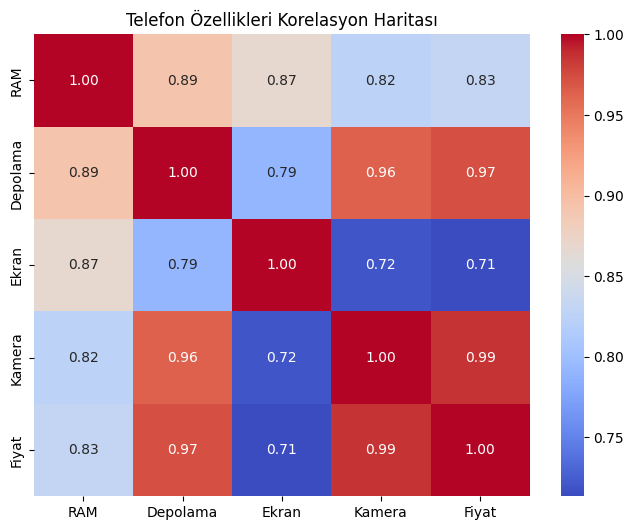

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# 1. 20 adet telefon verisi
data = pd.DataFrame({
    'RAM':       [2, 4, 6, 8, 12, 4, 6, 8, 12, 16, 3, 6, 8, 8, 4, 6, 10, 12, 6, 8],
    'Depolama':  [32, 64, 128, 128, 256, 64, 128, 128, 256, 512, 64, 128, 128, 256, 64, 128, 256, 512, 128, 256],
    'Ekran':     [5.0, 5.5, 6.1, 6.3, 6.7, 5.8, 6.0, 6.4, 6.5, 6.8, 5.2, 6.2, 6.3, 6.6, 5.5, 6.1, 6.6, 6.9, 6.3, 6.7],
    'Kamera':    [8, 12, 16, 48, 64, 13, 20, 32, 64, 200, 5, 24, 48, 108, 12, 16, 64, 200, 50, 64],
    'Fiyat':     [3000, 4500, 7000, 10000, 14000, 5000, 7500, 9000, 13000, 40000, 2500, 6800, 9800, 17000, 4900, 7200, 12000, 39000, 8500, 16000]
})

# 2. Özellik ve hedef ayrımı
X = data[['RAM', 'Depolama', 'Ekran', 'Kamera']]
y = data['Fiyat']

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

yeni_telefon = pd.DataFrame({
    'RAM': [1],
    'Depolama': [190],
    'Ekran': [5.2],
    'Kamera': [2]
})

# 5. Tahmin
tahmin = model.predict(yeni_telefon)
print(f"Tahmini fiyat: {tahmin[0]:.2f} TL")
# Korelasyon matrisini hesapla
corr = data.corr()

# Korelasyon haritası çizimi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Telefon Özellikleri Korelasyon Haritası")
plt.show()


Tahmini fiyat: 1169.11 USD


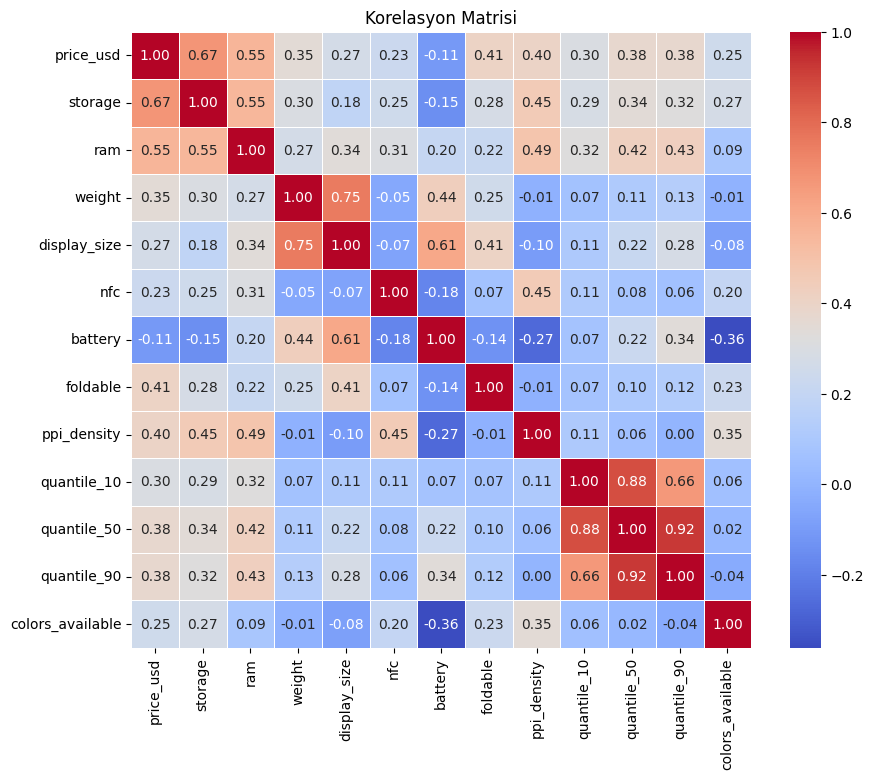

In [79]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi oku
df = pd.read_csv(r"csv/phones.csv")

# Özellik ve hedef değişken
X = df[["ram", "storage", "display_size", "weight"]]
y = df["price_usd"]

# Modeli oluştur ve eğit
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X, y)

# Yeni telefon verisi için tahmin
yeni_telefon = pd.DataFrame(
    [{"ram": 700, "storage": 1024, "display_size": 6.2, "weight": 199.0}]
)

tahmin = model.predict(yeni_telefon)
print(f"Tahmini fiyat: {tahmin[0]:.2f} USD")


numeric_df = df.select_dtypes(include=[float, int])

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))  # Boyutları ayarlayabilirsin
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Başlık ve göster
plt.title("Korelasyon Matrisi")
plt.show()